In [73]:
# Importera paket
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import scipy.stats as scs 
from scipy.stats import t
from scipy.stats import norm
from statsmodels.formula.api import ols


# Importera Cars/Auto-mpg
filepath = '../Data/auto-mpg.csv'
cars = pd.read_csv(filepath)

In [9]:
sns.objects.area()

AttributeError: module 'seaborn' has no attribute 'objects'

In [3]:
cars.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [4]:
cars['horsepower'].median() # Beräkna medianen med Pandas

93.5

In [5]:
np.median(cars['mpg']) # Beräkna medianen med NumPy

23.0

In [6]:
cars['displacement'].mean() # Beräkna medelvärdet med Pandas

193.42587939698493

In [7]:
np.mean(cars['mpg']) # Beräkna medelvärdet med NumPy

23.514572864321607

In [8]:
cars['mpg'].std() # Beräkna standardavvikelse med Pandas

7.815984312565782

In [9]:
np.std(cars['mpg'],ddof=1) # Beräkna standardavvikelse med NumPy

7.815984312565782

In [10]:
cars['horsepower'].describe() # Beräkna deskriptiva mått i Pandas.

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

## Konfidensintervall

In [11]:
# Subsetta data för origin = 'Japan'
cars_japan = cars[cars['origin'] == 'japan']

In [12]:
cars_japan.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
14,24.0,4,113.0,95.0,2372,15.0,70,japan,toyota corona mark ii
18,27.0,4,97.0,88.0,2130,14.5,70,japan,datsun pl510
29,27.0,4,97.0,88.0,2130,14.5,71,japan,datsun pl510
31,25.0,4,113.0,95.0,2228,14.0,71,japan,toyota corona
53,31.0,4,71.0,65.0,1773,19.0,71,japan,toyota corolla 1200
54,35.0,4,72.0,69.0,1613,18.0,71,japan,datsun 1200
57,24.0,4,113.0,95.0,2278,15.5,72,japan,toyota corona hardtop
71,19.0,3,70.0,97.0,2330,13.5,72,japan,mazda rx2 coupe
81,28.0,4,97.0,92.0,2288,17.0,72,japan,datsun 510 (sw)
82,23.0,4,120.0,97.0,2506,14.5,72,japan,toyouta corona mark ii (sw)


In [13]:
mean = np.mean(cars_japan['mpg'])
std = np.std(cars_japan['mpg'], ddof=1)
n = len(cars_japan['mpg'])

alpha = 0.05
t_crit = t.ppf(1-alpha/2, n-1) # Beräkna kritiskt t-värde
sem = std / np.sqrt(n) # Beräkna medelvärdesstandardfel 

upper = mean - t_crit * sem # Beräkna under gräns
lower = mean + t_crit * sem # Beräkna övre gräns

In [14]:
round(lower, 1), round(upper, 1)  # Avrundning till 1 decimal

(31.8, 29.1)

In [15]:
# Printa konfidensintervall
print('Confidence interval (\u03B1=0.05) for average mpg of \'japanese\' cars: ' + str(round(mean,1)) + ' \u00B1 ' + str(round(t_crit*sem,1))) 

Confidence interval (α=0.05) for average mpg of 'japanese' cars: 30.5 ± 1.4


In [16]:
# Beräkna standard error med sem()
sem = scs.sem(cars_japan['mpg']) 

# Beräkna undre samt övre gräns
lower, upper = t.interval(confidence=1-alpha, df=n-1, loc=mean, scale=sem) 

# Printa konfidensintervall
print(f'Confidence interval (\u03B1=0.05) for average mpg of \'japanese\' cars: {round(lower,1)}-{round(upper,1)}') 

Confidence interval (α=0.05) for average mpg of 'japanese' cars: 29.1-31.8


In [17]:
# Subsetta data för origin = 'USA'
cars_usa = cars[cars['origin'] == 'usa']

In [18]:
mean = np.mean(cars_usa['mpg'])
std = np.std(cars_usa['mpg'], ddof=1)
n = len(cars_usa['mpg'])

alpha = 0.05
t_crit = t.ppf(1-alpha/2, n-1) # Beräkna kritiskt t-värde
sem = std / np.sqrt(n) # Beräkna medelvärdesstandardfel 

upper = mean - t_crit * sem # Beräkna under gräns
lower = mean + t_crit * sem # Beräkna övre gräns

In [19]:
# Printa konfidensintervall
print('Confidence interval (\u03B1=0.05) for average mpg of \'american\' cars: ' + str(round(mean,1)) + ' \u00B1 ' + str(round(t_crit*sem,1))) 

Confidence interval (α=0.05) for average mpg of 'american' cars: 20.1 ± 0.8


In [20]:
# Beräkna standard error med sem()
sem = scs.sem(cars_usa['mpg']) 

# Beräkna undre samt övre gräns
lower, upper = t.interval(confidence=1-alpha, df=n-1, loc=mean, scale=sem) 

# Printa konfidensintervall
print(f'Confidence interval (\u03B1=0.05) for average mpg of \'american\' cars: {round(lower,1)}-{round(upper,1)}') 

Confidence interval (α=0.05) for average mpg of 'american' cars: 19.3-20.9


## Hypotestest:
1) Skiljer sig Japanska bilars mpg från det totala 
(tvåsidigt test)

 $H_A: \mu \neq 23.5\,mpg$

 $H_0: \mu = 23.5\,mpg$

2)  Japanska bilar drar mindre än Amerikanska (högre mpg)

In [21]:
# Beräkna medelvärdet för mpg på hela populationen, Avrunda till 1 decimal
cars['mpg'].mean().round(1)

23.5

In [22]:
# Välj kolonnen 'mpg'
mpg_japan = cars_japan['mpg']

xbar = mpg_japan.mean().round(1) # Beräkna stickprovsmedelvärde, Avrunda till 1 decimal
mu = 23.5 # Sätt mu till värde för nollhypotesen

std = mpg_japan.std(ddof=1).round(1) # Beräkna standardavvikelsen för stickprovet, Avrunda till 1 decimal
n = len(mpg_japan) # Beräkna storlek på stickprovet

# Beräkna värdet på test-statistikan
statistic = (xbar - mu) / (std - np.sqrt(n))
print('Test statistic: ' +str(statistic))

# Beräkna p-värde för stickprovet
p_value = 1 - t.cdf(x=statistic, df=n-1)
print('p-value: ' + str(2*p_value))

Test statistic: -2.5105853295335994
p-value: 1.9858780232359212


In [23]:
result = scs.ttest_1samp(a=mpg_japan, popmean=mu, alternative='greater') # Genomför två-sidigt t-test m.h.a. ttest_1samp() i SciPy 

print(result) # Printa resultatet 

TtestResult(statistic=10.144185387768616, pvalue=3.3351739319052503e-16, df=78)


## Korrelationsanalys/Regressionsanalys

Påverkar motorstorlek (displacement) bilens bränsleförbrukning (mpg)

responsvariabel = mpg
förklaringsvariabel = displacement

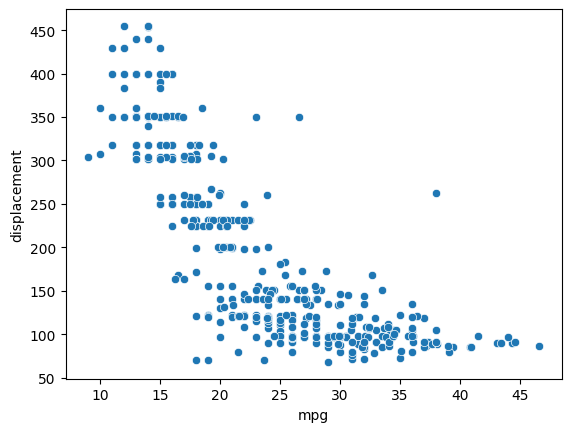

In [37]:
#Scatterplot
sns.scatterplot(data=cars, x='mpg', y='displacement')
plt.show()

In [32]:
# OLS regression
model = ols('displacement ~ mpg', data=cars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           displacement   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     725.0
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.66e-91
Time:                        14:11:33   Log-Likelihood:                -2206.7
No. Observations:                 398   AIC:                             4417.
Df Residuals:                     396   BIC:                             4425.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    445.7029      9.872     45.147      0.0

In [29]:
# Korrelation med scipy.stats
r,p = scs.pearsonr(cars['displacement'], cars['mpg'])
print(r,p)

-0.8042028248058977 1.6558889101933528e-91


Uträkningen visar på att ju större värde på "displacement", destu mindre blir värdet på "mpg".

Alltså kan man dra slutsaten att större motorstorlek leder till högre bränsleförbukning!

In [36]:
# In-Sample prediktion
ypred = model.predict(cars['mpg'])
ypred

0      252.589194
1      284.774813
2      252.589194
3      274.046273
4      263.317733
          ...    
393    156.032336
394    -26.352840
395    102.389637
396    145.303796
397    113.118177
Length: 398, dtype: float64

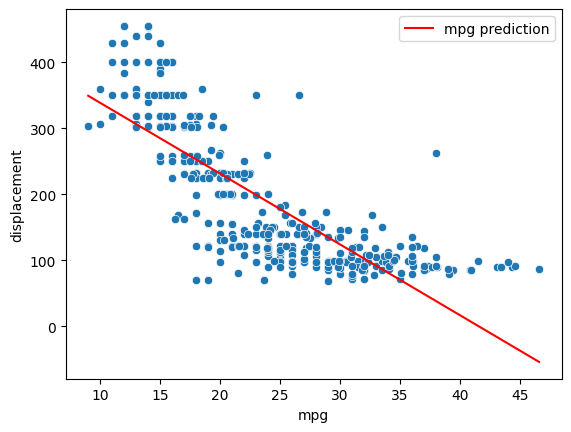

In [43]:
scatterplot = sns.scatterplot(data=cars, x='mpg', y='displacement')

scatterplot.plot([cars['mpg'].max(), cars['mpg'].min()],
                 [ypred.min(), ypred.max()],
                 "r", label='mpg prediction')
scatterplot.legend(loc='best')

plt.show()

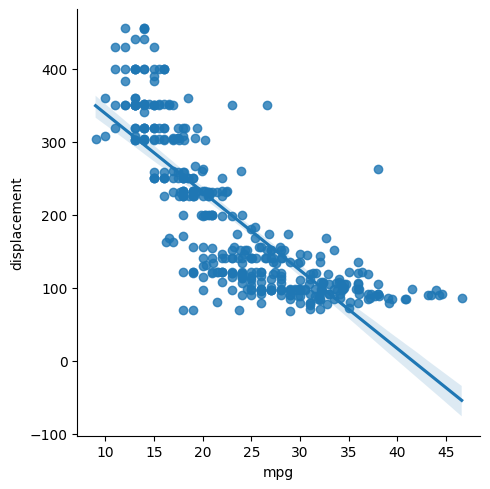

In [48]:
sns.lmplot(data=cars, x='mpg', y='displacement')

In [50]:
df = pd.DataFrame(cars)

cars_numerical = df.select_dtypes(include=['number'])
corr = cars_numerical.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<Axes: >

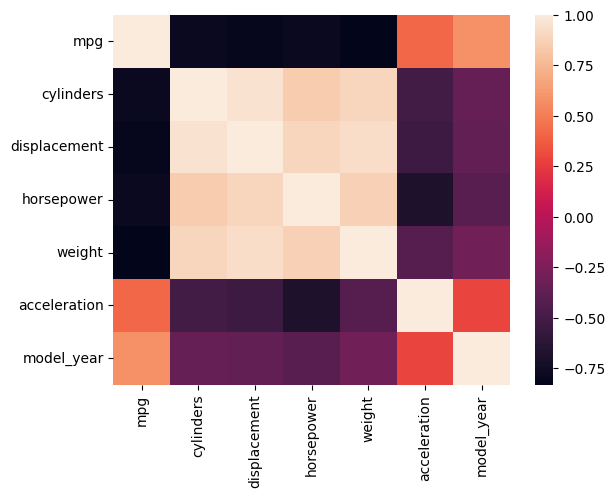

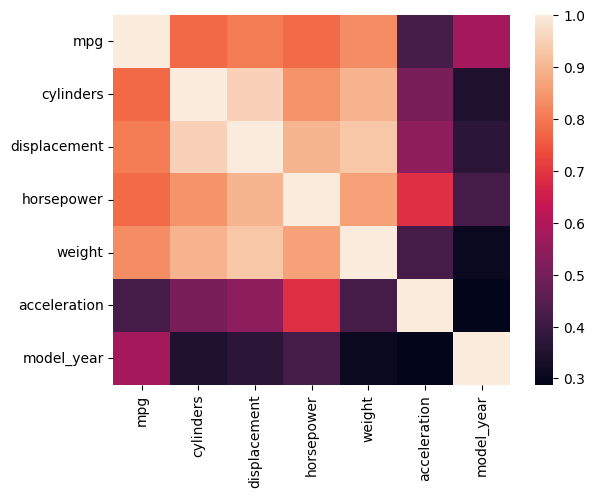

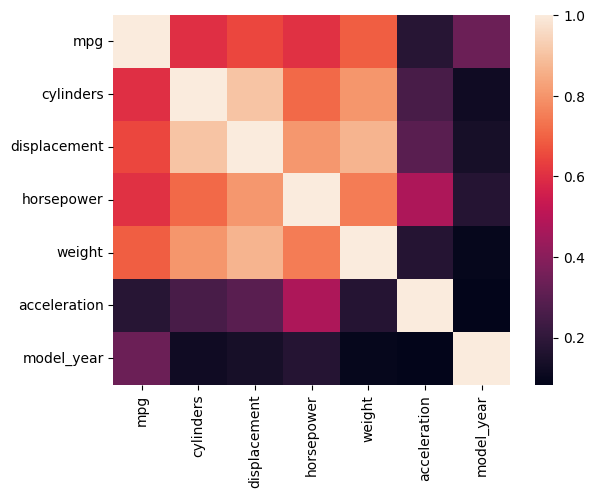

In [58]:
sns.heatmap(corr)
plt.figure()
sns.heatmap(abs(corr))
plt.figure()
sns.heatmap(corr**2)

<Axes: >

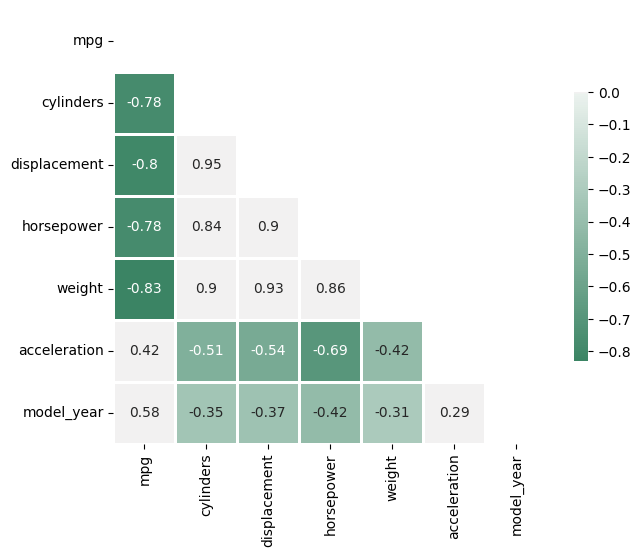

In [72]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# plot
f, ax = plt.subplots(figsize=(7, 7))

# Generate custom diverging colormap
cmap = sns.diverging_palette(150, 20, as_cmap=True)

# Draw heatmap with map and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, 
            vmax=0, center=0, annot=True,
            square=True, linewidths=.8, cbar_kws={"shrink": .5})



In [75]:
# Prediktionsintervall in sample-prediktion

predictions = model.get_prediction(cars['mpg'])

frame = predictions.summary_frame(alpha=0.05)
ypred = frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,130.368131,374.810256
1,162.448144,407.101482
2,130.368131,374.810256
3,151.759814,396.332732
4,141.066478,385.568989
...,...,...
393,33.857126,278.207546
394,-149.547142,96.841462
395,-19.935789,224.715063
396,23.108571,267.499021


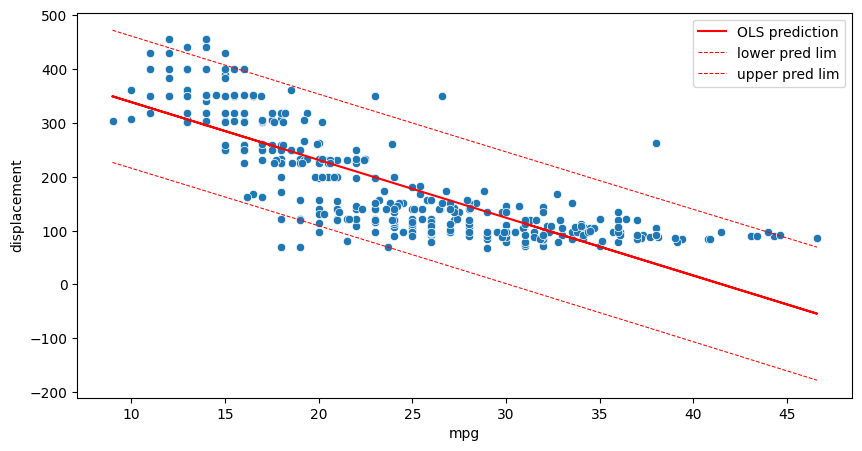

In [76]:
order = np.argsort(cars['mpg'])
xs = np.array(cars['mpg'])[order]

fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(data=cars, x='mpg', y='displacement')
ax.plot(cars['mpg'], ypred, "r", label='OLS prediction')

order = np.argsort(cars['mpg'])
x = np.array(cars['mpg'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label='lower pred lim', linewidth=0.75)
ax.plot(xs, upper, 'r--', label='upper pred lim', linewidth=0.75)

ax.legend(loc='best')
plt.show()